In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#  Этапы проверки статистической гипотезы
* Формулирование нулевой и альтернативной гипотезы;
* Выбор статистического критерия
* Определение уровня значимости;
* Расчет статистики критерия и/или p - value;
* Интепретация результатов

#  Проверки гипотез 

## t-критерий Стьюдента для несвязных выборок

![st](https://i.pinimg.com/originals/38/39/58/383958ca7ad8b647440bf3921ac2b6ad.png)

В то время как нормальное распределение полностью описывается двумя параметрами — средним значением и стандартным отклонением, <span class="birk">t-распределение</span> описывается лишь одним параметром, так называемыми <span class="burk">степенями свободы</span>. 

Чем больше степеней свободы, тем больше t-распределение похоже на нормальное распределение с нулевым средним и стандартным отклонением, равным 1. По мере уменьшения степеней свободы, это распределение становится более широким с более толстыми чем у нормального распределения, хвостами. 

Более толстые хвосты для выборок меньших размеров соответствуют увеличенной возможности наблюдать более крупные отклонения от среднего значения.

![im](https://wiki.loginom.ru/images/t-distrib.svg)

Критерий Стьюдента для расчета значения статистики критерия оперирует таким понятием как степени свободы.

***Число степений свободы*** - это число свободно варьирующихся элементов в составе выборки. То есть число элементов, через которое мы можем выразить выбранное из ряда значение, зная объем выборки и среднее.
* Например: у нас есть ряд a = 2,4,6,8,10. Его среднее арифметическое = 6. Количество элементов = 5. Любой элемент может быть выражен через выражение: *n * a_среднее - sum(a)*.

Проверим:
выразим последний элемент,равный 10 через среднее и все остальные элементы: *6 * 5 - 2 + 4 + 6 + 8 = 30 - 20 = 10*

Но если бы вым сказали, что есть 3 числа, среднее которых равно 10, и одно из них 10, то вам бы не удалось точно восстановить 3 числа, потому что кол-во вариантов беконечно. Таким образом, надо было знать 2 числа.

Таким образом, количество степеней свободы  - количество чисел, которые мы имеем, чтобы выразить любой элемент через его среднее.
По классике обозначается как: ***Размер выборки - 1*** 

<span class="burk">Тест</span>

<!-- Пусть мы  провели тест в ходе которого для одной группы пользователей мы выводили доступные для применения офферы на КБ, а для другой нет. В качестве метрики мы выбрали среднюю конверсию в покупку. Данные сгенерированы, но близки к реальности)
 -->

<!-- Пусть у нас есть интернет магазин. Мы провели тест в ходе которого одной группе пользовавтелей мы слали пуш с самыми выгодными товарами и сообщениями о скидках, а другой группе пользователей не слали ничего. После теста нам нужно посмотреть, было ли это выгодно. В качестве метрики мы взяли кол-во покупок клиента 
 -->
Пусть у нас есть интернет магазин. Но аудитория нашего интернет магазина не очень взрослая, у людей не так много денег. Поэтому мы захотели провести акцию с целью привлечения более взрослого населения.

После акции мы хотим проверить, насколько она была эффективной. 
* ***Полученные данные***

In [7]:
age_n = np.random.normal(25, 2, 10000)
age_n1 = np.random.normal(40, 5,10000)

C:\Users\m.pashentseva\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

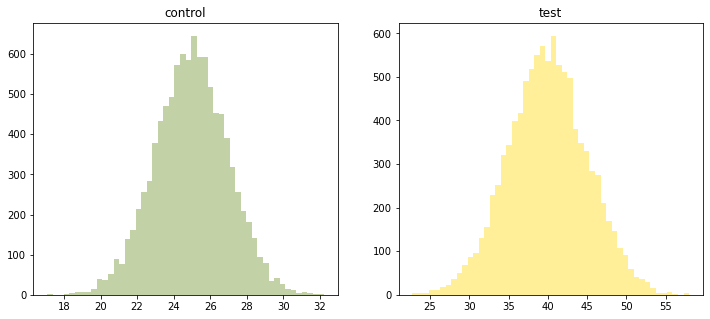

In [8]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(age_n,color = 'olivedrab',hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(age_n1,color = 'gold',hist = True, kde = False,ax=ax)
ax.set_title('test')

### Проверим данные на нормальность:

#### QQ-plot



***Квантиль дискретной выборки*** — это одна из точек, делящих упорядоченную последовательность чисел на равные части.
![im](https://habrastorage.org/r/w1560/getpro/habr/upload_files/0b0/fde/cdf/0b0fdecdf33f3e8ff5d56cd74f700f3b.jpg)

Понятия 0.25 квантиль, 1 квартиль и 25 персентиль обозначают одно и то же, как и 2 квартиль, 0.5 квантиль и 50 персентиль.

***Квантиль непрерывного распределения*** — это одна из точек, делящих функцию плотности распределения на участки, вероятность попадания в которые одинакова, то есть на участки одинаковой площади.

![im](https://habrastorage.org/r/w1560/getpro/habr/upload_files/ced/171/7c6/ced1717c6ccf73d530fa4fedc8532e87.png)

![image.png](https://habrastorage.org/r/w1560/getpro/habr/upload_files/e87/0ca/f0e/e870caf0e1a061e27586f64a5d543eec.jpg)

![image-2.png](https://habrastorage.org/r/w1560/getpro/habr/upload_files/145/a92/71d/145a9271df6739b90af2fb19165fa559.jpg)

Подробнее читать тут: https://habr.com/ru/post/578754/

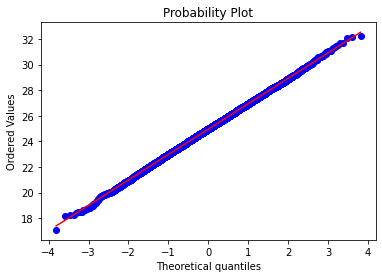

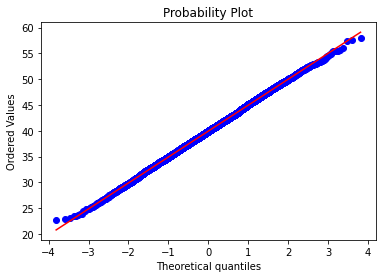

In [9]:
stats.probplot(age_n, dist="norm", plot=plt)
plt.show()

stats.probplot(age_n1, dist="norm", plot=plt)
plt.show()


#### Критерий Шапиро-Уилка

Нулевая гипотеза H0 теста <span class="burk">Шапиро–Уилка</span> заключается в том, что случайная величина, выборка x которой известна, распределена по нормальному закону. 

Альтернативная гипотеза H1 заключается в том, закон распределения не является нормальным.


Для выполнения теста Шапиро-Уилка предназначена функция stats.shapiro,
принимающая на вход выбокру x объема не меньше 3 и не больше 5000.

Функция возвращает список со следующими компонентами:

• ***statistic*** – значение статистики теста, которую принято обозначать
буквой W;

• ***p.value*** – апроксимация p-value для полученного значения статистики;


In [10]:
groups = [age_n,age_n1]

In [11]:
#Критерий Шапиро-Уилка
# используется для проверки гипотезы H_0:
# «случайная величина X распределена нормально» 
# является одним наиболее эффективных критериев проверки нормальности.
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.01:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Normal W= 0.9999 p-value 0.7928
Normal W= 0.9998 p-value 0.2816


C:\Users\m.pashentseva\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Тест

 Чего мы ожидаем? Конечно, мы ожидаем что возраст в тестовой группе будет выше. 
<!--Но! Какой исход нас волнует? На самом деле для нам важно понять, стал ли возраст выше или ниже. Поэтому мы формулируем двустороннюю альтернативную гипотезу!  -->

Как сформулировать гипотезы в этом случае?


* H0 - средний возраст в группах не имет значимых различий;
* H1 - средний возраст в группах больше в тестовой выборке

Что дальше? Определим уровень значимости.
* Берем a = 0.05

**Рассчитаем статистику критерия Стьюдента**

![st](https://i.pinimg.com/originals/38/39/58/383958ca7ad8b647440bf3921ac2b6ad.png)

Вычислим сами средний возраст, раз уж мы сравниваем 

In [12]:
mean_a = np.mean(age_n)
mean_b = np.mean(age_n1)
print('Средний возраст в контрольной группе = ',mean_a)
print('Средний возраст в тестовой группе = ',mean_b)

Средний возраст в контрольной группе =  24.962565171996747
Средний возраст в тестовой группе =  39.95298268996873


Дальше нам надо вычислить их разность, разницу берем по модулю без учета знака

In [13]:
mean_diff = mean_a - mean_b
print('Разница выборочных средних = ',mean_diff)

Разница выборочных средних =  -14.99041751797198


Дальше вычисляем стандартную ошибку разности выборочных средних. Из прошлой лекции мы знаем, что это такое и какой смысл в расчете этого значени.

In [14]:
#количество элементов в выборках
n1 = len(age_n)
n2 = len(age_n1)

#дисперсии
var_a = np.var(age_n,ddof = 1)
var_b = np.var(age_n1,ddof = 1)

#стандартные отклонения
sd_a = np.sqrt(var_a)
sd_b = np.sqrt(var_b)

#стандартная ошибка разности средних
sem = np.sqrt(sd_a**2/n1 + sd_b**2/n2)

print('Стандартная ошибка разности средних = ',sem)

Стандартная ошибка разности средних =  0.05401725363901048


Получим статистику критерия

In [15]:
t = mean_diff/sem
print('t-критерий =',t)

t-критерий = -277.5116561488072


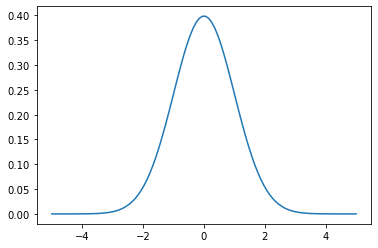

In [24]:
#Плотность вероятности -  при заданном распределении, какова вероятность наблюдения
x = np.linspace(-5.0, 5.0, 100)
#степени свободы
df = (n1 + n2) - 2
plt.plot(x,stats.t.pdf(x, df) )

Получим p-value


**Уровень значимости** - вероятность ошибочного отклонения нулевой гипотезы или иными словами, вероятность совершения ошибки первого рода. Конечно, мы берем не саму вероятность, а задаем фиксированное число, которую наша наша вероятность не должна превышать.
Всем известные значения **p-value**, равные 0.05,0.01 и 0.001 - это стандартные уровни статистической значимости, используемые аналитиками при проверке гипотез.
Иначе говоря, уровень значимости **(p-value)** – это наименьшее значение уровня значимости (т.е. вероятности отказа от справедливой гипотезы), для которого вычисленная проверочная статистика ведет к отказу от нулевой гипотезы. 

Кол-во степеней свободы =  19998
p_value =  0.0


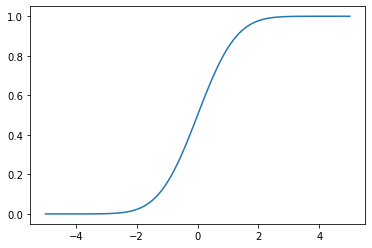

In [23]:
#степени свободы
df = (n1 + n2) - 2
x = np.linspace(-5.0, 5.0, 100)

print('Кол-во степеней свободы = ', df )

#Функция распределения показывает при заданном распределении (Стьюдента),
# какова вероятность того, что результат окажется меньше или равен заданному
plt.plot(x,stats.t.cdf(x, df) )
print("p_value = ",stats.t.cdf( t, df) )

In [166]:
#степени свободы
df = (n1 + n2) - 2

#p - value
p = stats.t.cdf(t, df) 

if p > 0.05: 
    print('Нет статистически значимой разницы','\nt - критерий = ',t,'\np-value =',p)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t,'\np-value =',p)

Есть статистически значимая разница 
t - критерий =  -287.96055208342597 
p-value = 0.0


Тоже самое можно сделать  с помощью scipy

In [97]:
t2, p2 = stats.ttest_ind(age_n,age_n1)


if p2 > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t2,'\np-value =',p2)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t2,'\np-value =',p2)

Есть статистически значимая разница 
t - критерий =  -287.960552083426 
p-value = 0.0


##   Непараметрический критерий Манна - Уитни

Мы увидели, что акция на привлечение более взрослой аудитории дала значимый результат, поэтому решили провести тест и узнать как же это повлияло на оборот клиентов)

In [30]:
control = np.random.exponential(scale=1000.0, size=1000)
test = np.hstack((np.random.exponential(scale=1000.0, size=500),np.random.normal(1000, 200, 500)))

d = {"a":control,"b": test}
df = pd.DataFrame(d)

C:\Users\m.pashentseva\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\m.pashentseva\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

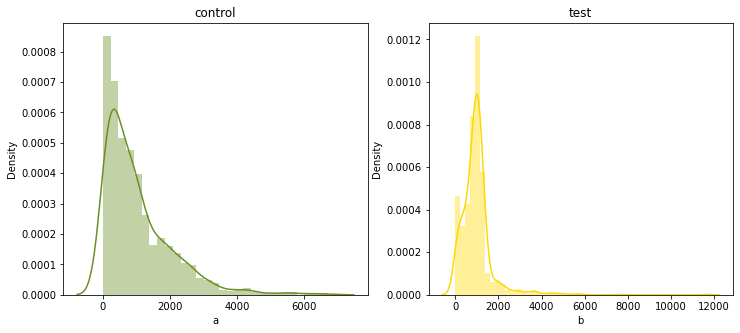

In [31]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df['a'],color = 'olivedrab',hist = True,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(df['b'],color = 'gold',hist = True,ax=ax)
ax.set_title('test')

Проверим данные на нормальность

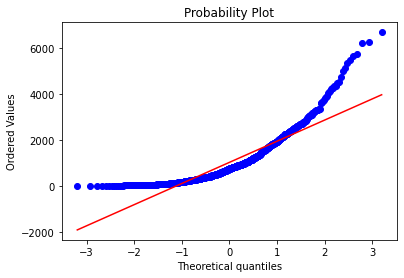

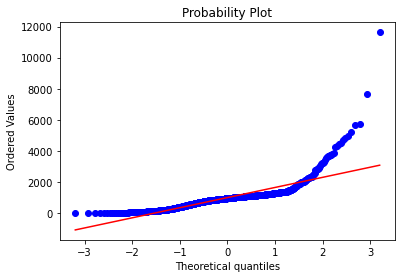

In [32]:
stats.probplot(df['a'], dist="norm", plot=plt)
plt.show()

stats.probplot(df['b'], dist="norm", plot=plt)
plt.show()

In [33]:
groups = [df['a'], df['b']]

In [34]:
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.01:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Not normal W= 0.8299 p-value 0.0
Not normal W= 0.6706 p-value 0.0


Наши денежки распределены не нормально.  С таким мы тоже умеем работать.
Один из популярных методов сравнения в двух независимых группах - ***критерий Манна-Уитни***.

**Непараметрические** критерии не требуют соответствия какому-либо из распределений. Непараметрические критерии заменяют реальные значения признака рангами (номерами элементов в упорядоченной по возрастанию выборке). Мы все вычисляем на основе полученных рангов, таким образом, мы и правда не привязываемся к параметрам распределения, как в случае с критерием Стьюдента



**Критерий Манна-Уитни** представляет непараметрическую альтернативу t-критерия для независимых выборок. Преимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий. Необходимо, чтобы данные были измерены как минимум в порядковой шкале. Относится к ранговым критериям.

Интерпретация теста по существу похожа на интерпретацию результатов t-критерия для независимых выборок, за исключением того, что U критерий вычисляется, как сумма индикаторов попарного сравнения элементов первой выборки с элементами второй выборки. U критерий - наиболее мощная (чувствительная) непараметрическая альтернатива t-критерия для независимых выборок; фактически, в некоторых случаях он имеет даже большую мощность, чем t-критерий.

Алгоритм расчета критерия прост и интуитивно понятен

**Важная поправка** при больших значениях выборки распределение U-критерия быстро сходится к нормальному распределению, поэтому для интерпретации рассчитывается z-значение, если количество элементов в выборках больше 60. У нас больше)))

***Формула для расчета U-критерия (статистики теста):***

![u](https://i.pinimg.com/564x/7f/40/70/7f407010828abd65c1602e0472a8a096.jpg)

**Из двух выборок получим одну,отсортируем и затем расставим ранги**. Максимальное значение в группе имеет первый ранг и так далее.

In [35]:
# объединяем в один столбец наши выборки
df1 = df.stack().reset_index(-1).iloc[:, ::-1]
df1.columns = ['value', 'group']
df1

,value,group
0,407.747976,a
0,150.367922,b
1,1380.590878,a
1,585.468945,b
2,1846.665185,a
...,...,...
997,1133.044215,b
998,225.330739,a
998,783.070667,b
999,1371.201459,a


In [36]:
# проставлем ранги (номера элементов в упорядоченной по возрастанию выборке)
df1['rank'] = df1['value'].rank(ascending = False, numeric_only = True)

In [37]:
df1.head()

,value,group,rank
0,407.747976,a,1500.0
0,150.367922,b,1796.0
1,1380.590878,a,369.0
1,585.468945,b,1340.0
2,1846.665185,a,248.0


In [38]:
# Дальше необходимо вычислить сумму рангов
df1.groupby('group')['rank'].sum()

group
a    1048689.0
b     952311.0
Name: rank, dtype: float64

In [39]:
# разделяем обратно на 2 выборки
a = df1[df1['group'] == 'a']['value']
b = df1[df1['group'] == 'b']['value']
rank_a = df1[df1['group'] == 'a']['rank'].sum()
rank_b = df1[df1['group'] == 'b']['rank'].sum()

![u](https://i.pinimg.com/564x/7f/40/70/7f407010828abd65c1602e0472a8a096.jpg)

In [40]:
# Вычисляем критерий по формуле
def U(a,b,rank_a,rank_b):
    number_of_values_a = a.count() #N1
    number_of_values_b = b.count() #N2
    all_values = number_of_values_a * number_of_values_b #N1*N2
    max_rank = max(rank_a,rank_b) #T_x, x=1,2
    max_count = float() #N_x , x=1,2
    if rank_a > rank_b:
        max_count = number_of_values_a
    else:
        max_count = number_of_values_b
    return (all_values + (max_count * (max_count + 1))/2) - max_rank

In [41]:
print('U-критерий =',U(a,b,rank_a,rank_b))

U-критерий = 451811.0


Теперь это надо как-то интерпретировать и вывести p-value. Выше упоминали, что при размере выборки > 60 распределение U-критерия отлично сходится к нормальному, поэтому мы рассчитываем z-значение для нашего U-критерия и по нему получаем наш заветный p-value и результат т.к. Z-тест (z-критерий Фишера) — проверяет гипотезы, основанные на нормальном распределении

***Z - значение*** - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения. Это безразмерный статистический показатель используемый для сравнения значений разной размерности или шкалой измерений.

![z](https://i.pinimg.com/originals/9f/b5/36/9fb536c3c368b01f17b4231c4b842951.png)

In [42]:
def z_score(a,b):
    m_u = (a.count()*b.count())/2 
    sigma_u = np.sqrt((a.count()*b.count())*(a.count()+b.count()+1)/12)
    return (U(a,b,rank_a,rank_b) - m_u)/sigma_u

In [43]:
round(stats.norm.cdf(z_score(a,b)) * 2.0,4)

0.0002

In [44]:
def MannWhitney(a,b,rank_a,rank_b):
    U = min((rank_a - (a.count() * (a.count() + 1))/2),(rank_b - (b.count() * (b.count() + 1))/2))
    m_u = (a.count()*b.count())/2
    sigma_u = np.sqrt((a.count()*b.count())*(a.count()+ b.count()+1)/12)
    z_score = (U - m_u)/sigma_u
    p_val = stats.norm.cdf(z_score) 
    if p_val > 0.05:
        print('Нет статистически значимой разницы и оснований отвергнуть гипотезу H0','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
    else:
        print('Есть статистически значимая разница, гипотеза H0 отвергается','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
        return

In [45]:
MannWhitney(a,b,rank_a,rank_b)

Есть статистически значимая разница, гипотеза H0 отвергается 
U-критерий: 451811.0 
z_score -3.7317710632306773 
p-value 0.0001


In [46]:
stat, p_val = stats.mannwhitneyu(a,b,alternative = 'two-sided')
if p_val > 0.05:
    print('Статистически значимой разницы нет','\np-value',round(p_val,4),'\nU-критерий',stat)
else:
    print('Разница статистически значима','\np-value',round(p_val,4),'\nU-критерий',stat)

Разница статистически значима 
p-value 0.0002 
U-критерий 451811.0


##  Эффективное сравнение конверсий/долей. Критерий Хи-квадрат Пирсона

Критерий Хи-квадарт позволяет нам сравнить отношения количества успеха к неуспехам в двух таблицах.Под успешным можем подразумевать не толькол совершение действия, но и любое желаемое число, например можем сравнить доли успешно закрытых заказов, доли женщин студентов от всей группы и так далее. Позволяет сравнивать больше чем два значения и довольно таки эффективно.

Суть <span class="burk">теста</span> - сравнить конверсии в успешное закрытие заказа. <span class="birk">Давайте вместе сформулируем гипотезы</span>)

Н0: Доли не имеют значимого различия

Н1: Есть значимосе различие между долями

<!-- Выдвигается нулевая гипотеза о том, что наблюдаемые частоты соответствуют ожидаемым (т.е. между ними нет разницы, т.к. они взяты из той же генеральной совокупности).  Если этот так, то разброс будет относительно небольшим, в пределах случайных колебаний. Меру разброса определяют по статистике Хи-квадрат. 

![xi](https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_517/https://statanaliz.info/wp-content/uploads/2017/02/chi_sqr_01_02.png) -->

In [50]:
data = pd.read_csv('conversion_test.csv')

In [51]:
data.head()

,Order,group,status
0,1,1,0
1,2,1,0
2,3,1,1
3,4,1,1
4,5,1,0


![xi](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Chi-square_distributionPDF.png/488px-Chi-square_distributionPDF.png)

Критерий хи-квадарт вычисляем по формуле:

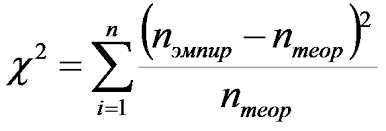

Значение Xи-квадрат используется для оценки меры рассогласованности наблюдаемого и ожидаемого результата. Если, согласно нулевой гипотезе, ожидаемый результат будет сильно отличаться от наблюдаемых значений, значит стоит поставить под сомнение справедливость гипотезы.

<span class="mark">Эмпимрические значения</span> - это те значения, которые мы получили на практике (В нашем случае это наши реальные конверсии в заказ)

<span class="mark">Теоретические значения</span> -  это те конверсии, которые бы мы получили, если бы была верна нулевая гипотеза об отсутствии значимого различия, то есть они должны быть равны.

Если сравниваем 2 группы, то нужно не забыть про **поправку Йетса**:

При использовании критерия Хи-квадрат Пирсона мы считаем, что дискретная вероятность наблюдаемых биномиальных частот в таблице может быть приближена непрерывным распределением хи-квадрат. Это предположение не совсем правильно, и вводит некоторую погрешность.

Для того, чтобы уменьшить погрешность в приближении Франк Йейтс , английский статистик, предложил поправку на непрерывность , которая регулирует формулу для хи-квадрат тест Пирсона путем вычитания 0,5 из разницы между каждой наблюдаемой величиной и его ожидаемого значения в таблице 2 × 2 на случай чрезвычайных ситуаций. Это уменьшает хи-квадрат значение,  и тем самым увеличивает ее p -value

Подробнее - https://ru.qwe.wiki/wiki/Yates's_correction_for_continuity

$\chi^2_Y = \sum_{}\frac{(|f_o - f_e| - 0.5)^2}{f_e}.$

o - Наблюдаемые частоты

е - Ожидаемые

Если мы сравниваем больше 2-х значений, то есть таблица сопряженности не 2на2, то вводить поправку Йетса не нужно. Эта формула в основном используется, когда хотя бы одна ячейка таблицы имеет ожидаемое количество меньше 5.



***Составляем таблицу сопряженности***

<span class="mark">Таблица сопряжённости</span>, или таблица контингентности, факторная таблица в статистике — средство представления совместного распределения двух переменных, предназначенное для исследования связи между ними. 

Таблица сопряжённости является наиболее универсальным средством изучения статистических связей, так как в ней могут быть представлены переменные с любым уровнем измерения. Таблицы сопряжённости часто используются для проверки гипотезы о наличии связи между двумя признаками с использованием точного теста Фишера или критерия согласия Пирсона.

Подробнее о структуре таких таблиц - https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8

In [52]:
table = pd.crosstab(
    data['group'],
    data['status'],
    margins = True
)
table

table1 = pd.crosstab(
    data['group'],
    data['status']
)
table

status,0,1,All
group,,,
0,189,189,378
1,186,190,376
All,375,379,754



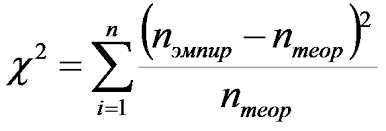

In [53]:
def Chisq(table):
    expected = []
    obs1 = np.append(table.iloc[0][0:2].values, table.iloc[1][0:2].values) #[189, 189, 186, 190]
    rows = table.iloc[0:2,2].values #[378, 376]
    cols = table.iloc[2,0:2].values #[375, 379]
    total = table.loc['All','All'] #754
    for count in range(2):
        for column in cols:
            expected.append((rows[count]*column)/total) # Ожидаемые частоты column/total - доля купивших во всей выборке
    obs = obs1 + 0.5 * np.sign(expected - obs1) 
    return sum(((obs - expected)**2)/expected)

**Число степеней свободы:** (rows - 1) * (cols - 1)
* в нашем случае: (2-1) * (2-1) = 1 * 1 = 1


In [11]:
Chisq(table)

0.005361664602799366

In [12]:
1 - stats.chi2.cdf(Chisq(table),1)

0.9416283551235602

In [67]:
p_value =  1- stats.chi2.cdf(Chisq(table),1)

if p_value > 0.05:
    print('Не можем отвергнуть нулевую гипотезу о том, что доли не имеют значимого различия', '\nХи-квадрат критерий=',Chisq(table),'\np-value = ',p_value)
else:
    print('Не можем принять нулевую гипотезу о том, что доли не имеют значимого различия','\nХи-квадрат критерий=',Chisq(table),'\np-value = ',p_value)

Не можем отвергнуть нулевую гипотезу о том, что доли не имеют значимого различия 
Хи-квадрат критерий= 0.005361664602799366 
p-value =  0.9416283551235602


In [14]:
stats.chi2_contingency(table1)
# Статистика теста, p_value, Степени свободы, Ожидаемые частоты, основанные на предельных суммах таблицы.

(0.005361664602799366,
 0.9416283551235602,
 1,
 array([[187.99734748, 190.00265252],
        [187.00265252, 188.99734748]]))

# Множественные сравнения. Поправки 

Множественные сравнения возникают, когда необходимо на одной и той же выборке параллельно проверить ряд статистических гипотез.
Например, у нас есть сразу два новых варианта нового дизайна главной страницы оформления заказа, и нам надо не только сроавнить их между собой, но и понять выигрывает ли какой-либо из них у уже существующего варианта и различаются ли они между собой.
Основная проблема при множественном сравнении это оценить результат, так как это становится не так просто и очевидно, как в случае с двумя выборками

Самая очевидная и простая <span class="burk">проблема</span>: если в тесте кроме контрольной группы есть несколько экспериментальных, то подведение итогов с уровнем значимости 0.05 приведёт к кратному росту доли <span class="burk">ошибок первого рода</span>. (Ошибка первого рода происходит, если мы фиксируем разницу между группами, хотя на самом деле её нет. )

Так происходит, потому что при каждом применении статистического критерия вероятность ошибки первого рода будет 5%. При количестве групп $ngroups$ и уровне значимости $\alpha$ вероятность, что какая-то экспериментальная группа выиграет случайно, составляет:

$P(any\ false\ positive) = 1 − (1 − \alpha) ^ {ngroups}$

Например, для трёх экспериментальных групп получим 14.3% вместо ожидаемых 5%.

Чтобы это избежать, вводим поправки.


## Критерий Стьюдента для множественных сравнений
### Поправка Бонферрони

С критерием Стьюдента мы отлично знакомы и знаем, что он прекрасно умеет сравнивать средние значения двух групп, но что, если групп у нас куда больше? Начнем с трех, которые обсудили выше. 

<span class="birk">Тест:</span> Мы имеем значения конверсий в заказ в трех разных группах с разным дизайном экрана оформления заказа

In [70]:
data = pd.read_csv('test_1.csv')

In [71]:
data.head()

,Unnamed: 0,a_v2o,b_v2o,c_v2o
0,0,0.321184,0.189354,0.420514
1,1,0.281803,0.240561,0.202318
2,2,0.236880,0.458195,0.527577
3,3,0.475370,0.129800,0.384633
4,4,0.456154,0.224778,0.425273


C:\Users\m.pashentseva\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='c_v2o'>

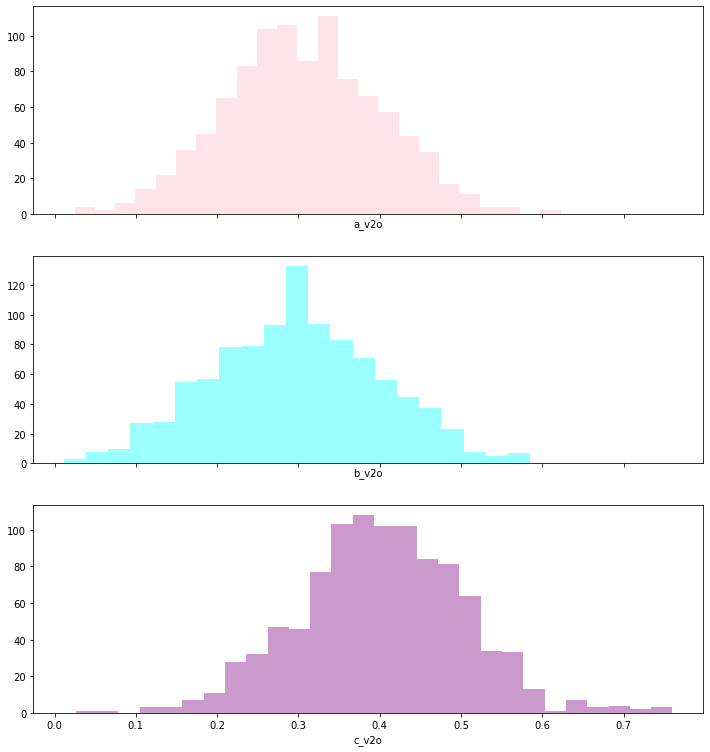

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(12,13))

sns.distplot(data['a_v2o'],color = 'pink',hist = True, kde = False,ax = ax1)

sns.distplot(data['b_v2o'],color = 'cyan',hist = True, kde = False,ax=ax2)

sns.distplot(data['c_v2o'],color = 'purple',hist = True, kde = False,ax=ax3)

Критерий Стьюдента для множественного сравнений основан на использовании поправок на множественные сравнения, например, одна из самых знаменитых, обсуждаемых и многими критикуемая - <span class="pirk">поправка Бонферрони</span>.Суть которого в целом очень проста, мы отвергаем нулевую гипотезу только тогда, когда p-value < $\alpha$/n, где n - количество сравнений, которые мы произведем в нашем эксперименте.

**Поправка Бонферрони** 
* Если мы хотим обеспечить вероятность ошибки $\alpha$, то в каждом из сравнений мы должны принять уровень значимости  $\alpha /n$ - это и есть поправка Бонферрони (<span class="girk">n - число сравнений</span>). Понятно, что такое уменьшение в несколько раз значимости делает тест достаточно "жестким" с ростом числа сравнений, установить различия становится достаточно трудно.


<span class="birk">Тест:</span> Итак, мы сравниваем 3 группы, значит нам потребуется сделать 3 сравнения
* контрольная vs test1
* контрольная vs test2
* test1 vs test 2

Таким образом, поправка Бонферрони говорит, что принимать решение о статистической значимости при изначально заданном уровне значимости 0.05 стоит только тогда, когда p-value < 0.05/3

Таким образом, алгоритм наших действий:
* 1) сравниваем варианты попарно;
* 2) принимаем решение, учитывая поправку Бонферрони

**Критерий Стьюдента мы рассчитываем умеем**

In [74]:
def ttest(a,b):
    mean_diff = np.mean(a) - np.mean(b)
    n1 = len(a)
    n2 = len(b)
    sd_a = np.sqrt(np.var(a,ddof = 1))
    sd_b = np.sqrt(np.var(b,ddof = 1))
    sem = np.sqrt(sd_a**2/n1 + sd_b**2/n2)
    t = mean_diff/sem
    df = (n1 + n2) - 2
    p = stats.t.cdf(-abs(t), df)  
    if p > 0.05/3:
        print('Нет статистически значимой разницы','\nt - критерий = ',t,'\np-value =',p)
    else:
        print('Есть статистически значимая разница','\nt - критерий = ',t,'\np-value =',p)
 
    return 

* сравниваем контрольную и первую тестовую группу

In [75]:
ttest(data['a_v2o'],data['b_v2o'])

Нет статистически значимой разницы 
t - критерий =  1.8864697433556141 
p-value = 0.029688288959205368


* контрольную и вторую тестовую группу

In [76]:
ttest(data['a_v2o'],data['c_v2o'])

Есть статистически значимая разница 
t - критерий =  -21.97017355857898 
p-value = 2.6444726659806283e-96


* первую и вторую тестовую

In [77]:
ttest(data['b_v2o'],data['c_v2o'])

Есть статистически значимая разница 
t - критерий =  -22.887022877809798 
p-value = 1.880349524646204e-103


 Мы получили результат, что контрольная и первая тестовая группа не имеют значимых различичий и вторая тестовая группа значимо отличается от контрольной и первой тестовой группы

Интуитивная простота - это главный плюс поправки Бонферрони, однако представьте, что у вас не 3 группы, а 30, и вам надо будет брать уровень значимости равный 0.05/435
* (n * (n-1))/2  (формула чтобы рассчитать сколько надо будет сравнений на всякий случай)

Поправка Бонферрони подвергается критике именно из-за этого: при большом количестве сравнений мы не будем находить значимых различий практически никогда из-за того что наш уровень значимости ставновится очень мал.


### Метод Холма - Бонферрони (метод Холма)

 <span class="pirk">Метод Холма - Бонферрони</span> - также называемый методом Холма,используется для борьбы с проблемой множественных сравнений. Является модификацией поправки Бонферрони и позволяет решать проблему уменьшения мощности при большом количестве сравнений.

Формула для определения уровня значимости

![hb](https://www.statisticshowto.com/wp-content/uploads/2016/09/holm-bonferroni-2-1.png)

* **target alpa level** - наш изначальный уровень значимости,заданный нами (0.05 например);
* **n** - количество сравнений
* **rank number of pair** - номер полученного p-value при сортировке от большего к меньшему

Возьмем прошлый пример 

In [81]:
def ttest(a,b):
    mean_diff = np.mean(a) - np.mean(b)
    n1 = len(a)
    n2 = len(b)
    sd_a = np.sqrt(np.var(a,ddof = 1))
    sd_b = np.sqrt(np.var(b,ddof = 1))
    sem = np.sqrt(sd_a**2/n1 + sd_b**2/n2)
    t = mean_diff/sem
    df = (n1 + n2) - 2
    return stats.t.cdf(-abs(t), df)  

Получим список результатов попарного сравнений наших выборок (список p-value):

In [82]:
values = [ttest(data['a_v2o'],data['b_v2o']),ttest(data['a_v2o'],data['c_v2o']),ttest(data['b_v2o'],data['c_v2o'])]

 Отсортируем от наименьшего к большему

In [83]:
sort_values = sorted(values)

Скорректируем наш уровень значимости по формуле,представленной выше

In [85]:
def Holm_Bonferroni(data):
    for i in data: #p_value
        if i < 0.05/(len(data) - (data.index(i) + 1) + 1): #поправка Холма - Бонферрони
            print ('Не можем  принять гипотезу H0','\ncorrected_p_value=',i/(len(data) - (data.index(i) + 1) + 1))
        else:
            print('Не можем отклонить гипотезу H0','\ncorrected_p_value=',i/(len(data) - (data.index(i) + 1) + 1))

In [86]:
Holm_Bonferroni(sort_values)

Не можем  принять гипотезу H0 
corrected_p_value= 6.26783174882068e-104
Не можем  принять гипотезу H0 
corrected_p_value= 1.3222363329903142e-96
Не можем  принять гипотезу H0 
corrected_p_value= 0.029688288959205368


##  Критерий Крускала-Уоллиса

**Критерий Крускала-Уоллиса** - непараметрический критерий, который предназначен для проверки равенства медиан нескольких выборок. Данный критерий является многомерным обобщением критерия Уилкоксона — Манна — Уитни.

Он используется для сравнения трех или более выборок, и проверяет нулевые гипотезы, согласно которым различные выборки были взяты из одного и того же распределения, или из распределений с одинаковыми медианами.

Расчет статистики Крускала-Уоллиса напоминает расчет статистики Манна-Уитни

* 1) Сначала все значения, независимо от того к какой выборке они относятся упорядочивают по возрастанию, как если бы это была одна выборка. Затем каждому значению присваивают ранг. Максимальное значение имеет  ранг = 1 и так далее.
* 2) затем рассчитываем тестовую статистику критерия Крускала-Уоллиса по формуле:

![ku](http://statistica.ru/upload/medialibrary/394/H.png)

где:
* **N** - общее количество значений суммарно;
* **R** - ранговая сумма;
* **$n_i$** - общее количество значений в выборке

Если число наблюдений велико, то итоговую статистику H сравнивают с критическим значением распределением <span class="burk">Хи-квадрат</span>

<span class="birk">Тест</span>: Мы узнали, что пуши оказали значимое влияние на чек покупателя. Но нам этого мало. Мы решили использовать всю свою мощь и начать СПАМИТЬ НА ПОЧТУ. И хотим сравнивать что сильнее сподвигнет на покупку (или добьет) наших клиентов. 

Вычислим ранги

In [87]:
df = pd.read_csv('test_KU.csv')

In [88]:
df = df[['sum1','sum2','sum3']]

In [89]:
df.head()

,sum1,sum2,sum3
0,10.938903,171.344986,171.136596
1,306.549486,159.213640,194.462454
2,77.575940,341.870275,42.828167
3,45.305877,88.674428,113.464977
4,52.753691,14.768973,2.950922


C:\Users\m.pashentseva\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum3'>

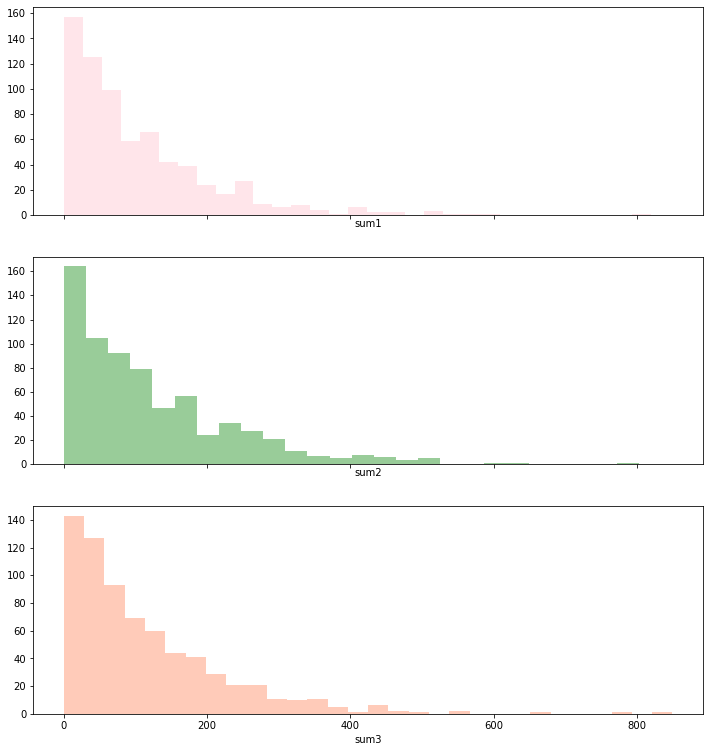

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(12,13))

sns.distplot(df['sum1'],color = 'pink',hist = True, kde = False,ax = ax1)

sns.distplot(df['sum2'],color = 'green',hist = True, kde = False,ax=ax2)

sns.distplot(df['sum3'],color = 'coral',hist = True, kde = False,ax=ax3)

In [91]:
# собираем данные в одну выборку

df1 = df.stack().reset_index(-1).iloc[:, ::-1]
df1.columns = ['value', 'group']
df1

,value,group
0,10.938903,sum1
0,171.344986,sum2
0,171.136596,sum3
1,306.549486,sum1
1,159.213640,sum2
...,...,...
698,124.119214,sum2
698,271.311624,sum3
699,9.346199,sum1
699,115.657295,sum2


In [95]:
# расставляем ранги (номера в общей выборке, отсортированной в порядке убывания)
df1['rank'] = df1['value'].rank(ascending = False, numeric_only = True)

In [96]:
df1.head()

,value,group,rank
0,10.938903,sum1,1912.0
0,171.344986,sum2,470.0
0,171.136596,sum3,471.0
1,306.549486,sum1,128.0
1,159.213640,sum2,536.0


Вычислим сумму рангов

In [97]:
df1.groupby('group')['rank'].sum()

group
sum1    772502.0
sum2    700275.0
sum3    733273.0
Name: rank, dtype: float64

In [98]:
# делим обратно на 3 выборки
a = df1[df1['group'] == 'sum1']['value']
b = df1[df1['group'] == 'sum2']['value']
c = df1[df1['group'] == 'sum3']['value']
rank_a = df1[df1['group'] == 'sum1']['rank'].sum()
rank_b = df1[df1['group'] == 'sum2']['rank'].sum()
rank_c = df1[df1['group'] == 'sum3']['rank'].sum()

Вычисляем по формуле:

![ku](http://statistica.ru/upload/medialibrary/394/H.png)

In [100]:
def H(a,b,c,rank_a,rank_b,rank_c,N):
    h1 = (rank_a)**2/len(a)
    h2 = (rank_b)**2/len(b)
    h3 = (rank_c)**2/len(c)
    sums = h1 + h2 + h3
    H = 12.0/ (N * (N + 1)) * sums - 3 * (N + 1)
    df = 3 - 1
    p = 1 - stats.chi2.cdf(H,df)
    if p < 0.05:
        print('Не можем отклонить гипотезу H0','\np-value=',p,'\nH-статистика = ',H)
    else:
        print('Не можем принять гипотезу H0','\np-value=',p,'\nH-статистика = ',H)
    

In [101]:
H(a,b,c,rank_a,rank_b,rank_c,len(df1))

Не можем отклонить гипотезу H0 
p-value= 0.006220681705575104 
H-статистика =  10.159751558539028


In [102]:
# Тоже самое с помощью Питона:
stats.kruskal(a,b,c)

KruskalResult(statistic=10.159751558539028, pvalue=0.006220681705575132)

# Полезные ссылки

Биномиальное распредленеие
http://statistica.ru/theory/binomialnoe-raspredelenie/

Про z-тест и p-value
https://habr.com/ru/post/557424/

Немного про z-оценку и что она означает
https://desktop.arcgis.com/ru/arcmap/10.3/tools/spatial-statistics-toolbox/what-is-a-z-score-what-is-a-p-value.htm

Про критическую область
http://statistica.ru/theory/proverka-gipotez/

Лекция из МФТИ о тесте Манна-Уитни
https://www.youtube.com/watch?v=esw61CSmjMI

Лекция, где простым языком объясняют о сути непараметрических тестов
https://www.youtube.com/watch?v=IcLSKko2tsg

Карта статистических методов - bootstrap VS t - test
https://www.youtube.com/watch?v=-zps6hm0nX8

Practitioner’s Guide to Statistical Tests от VK
https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f

Как улучшить ваши A/B-тесты: лайфхаки аналитиков Авито. Часть 1 и 2:
https://habr.com/ru/company/avito/blog/571094/
https://habr.com/ru/company/avito/blog/571096/

Множественные эксперименты: теория и практика:
https://habr.com/ru/company/yandex/blog/476826/

На что мы обращаем внимание при расчете статистической значимости A/B-теста:
https://habr.com/ru/company/uchi_ru/blog/500918/


Проверка статистических гипотез:
https://habr.com/ru/post/578754/

Таблица сопряженности:
https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8

